In [4]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

# LOAD TRAIN

In [5]:
import sys
import os
os.getcwd()

'/hd/sample-proposal'

In [6]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [7]:
from lib.utils.process_input import get_gen_outs

In [8]:

from lib.config.control import *

In [9]:
# X_train, y_train, _, _ = SINGLESTGAN.load_input("train")
# X_valid, y_valid, _, _ = SINGLESTGAN.load_input("valid")
# X_train

In [10]:
import numpy as np

# Input

In [11]:
# import lib.data.preprocess as preprocess
# train_df, valid_df, test_df = preprocess.load_prepared()
# train_df.head()

In [12]:
# o_train, train_buyers, train_nonbuyers = t.load_with_filters("train")
# X = o_train[0]

In [13]:
from lib.utils.process_input import fit_one_hots, get_gen_outs,apply_encoder_in_batch
import numpy as np
def apply_pad_2(mat, N):
    res = [0 for i in range(0,mat.shape[0])]
    i = 0
    for sample in mat:
        res[i] = pad_array_with_constant_arr(sample,i,N)
#         res[i] = np.expand_dims(res[i],axis=2)
        i+=1

    return np.array(res)

gen_outs = get_gen_outs()
PAD_ARRAY = []
no_first = False

MASK_VALUE = -2
for out in gen_outs:
    if out != 1 :
        array_out = np.full(out+1, 0).tolist()
        array_out[0] = 1
        PAD_ARRAY = PAD_ARRAY + array_out
    else:
        array_out = np.full(out, MASK_VALUE).tolist()
        PAD_ARRAY = PAD_ARRAY + array_out
# PAD_ARRAY += [-1.327298, -0.764341, -1.745852, -1.501220, -0.451318, -1.508622, -1.357883]
PAD_ARRAY = np.array([PAD_ARRAY])

print(PAD_ARRAY, PAD_ARRAY.shape)

def pad_array_with_constant_arr(arr, i , N):
    diff_ = N - arr.shape[0] 
    repeated =  np.repeat(PAD_ARRAY, diff_, axis=0)
    return np.vstack((repeated,arr))

def pad_arr(arr,i,N):
    diff_ = N - arr.shape[0] 
    if diff_ == 0:
        return arr
    if diff_ < 0:
        return arr[-N:]
#     return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
    return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
#     return pad_sequ

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0 

In [14]:
from lib.utils.process_input import *
from lib.input.single_stg.scale import create_readable_df_stg
from lib.input.single_stg import scale
from imp import reload
    # Do some things.
# single = reload(single)
# scale = reload(scale)

In [15]:
# scale.create_readable_df_stg(apply_pad_2(np.zeros((1,4,302)), 13), gen_outs, encoders)

In [16]:
# inp_lengths = list(range(1,14))

# X_f = []
# label_inp = []
# for inp_len in inp_lengths:
#     X_f_i = [x for x in X_train if len(x) == inp_len]
#     inp_ls = [inp_len for k in range(0,len(X_f_i))]
#     label_inp += inp_ls
#     X_f += X_f_i
# len(X_f)

# label_inp = np.array(label_inp)

In [17]:
# X_train_pad = apply_pad(np.array(X_f), 13)
# X_train_pad.shape

In [18]:
# from sklearn.utils import shuffle

# X_train_pad, label_inp = shuffle(X_train_pad, label_inp)

In [19]:

import lib.input.single_stg as single
from lib.models.single_stage import training
from imp import reload
    # Do some things.
training = reload(training)
single = reload(single)

## construct_dataset

In [20]:
os.getcwd()

'/hd/sample-proposal'

In [21]:
from collections import Counter, defaultdict
from numpy.random import randint
from lib.utils import misc

import itertools



def get_balanced_dataset_for_gan(dataset, X_train, y_train, train_inp_len):
    print("Counter(train_inp_len)",Counter(train_inp_len))
    min_len_ct = min(list(Counter(train_inp_len).values()))
    
    X_dict = defaultdict(list)        
    for i in range(1,13+1):
        ix_inp = np.where(train_inp_len == i)[0]
        ix_rand = randint(0, len(ix_inp),min_len_ct)

        ix_inp_rand = ix_inp[ix_rand]
        X_batch = X_train[ix_inp_rand]
        y_train_batch = y_train[ix_inp_rand]
    
        
        X_dict[i] = (X_batch, y_train_batch)
         
    dataset['train_gan'] = X_dict
    return dataset

def get_normal_dataset_for_gan(dataset, X_train, train_inp_len):
    dataset['train_gan'] = X_train, train_inp_len
    return dataset

In [24]:
from lib.models.single_stage import training as t
from numpy.random import randint
from numpy import ones, zeros
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.utils import shuffle
from lib.utils import misc

def get_batch_non_supervised(X,y_n,len_inp,n_samples):
    ix = randint(0, X.shape[0], n_samples)
    X = X[ix]
    y_n = y_n[ix]
    len_inp = len_inp[ix]

    return X,y_n,len_inp

TOTAL_CAT = 1
def construct_dataset(use_undersampling=True, balance_gan=False, batch_non_supervised=500000):
    dataset = {} 
    ## train

    X_train, y_train_class, y_train_items, SIT_train, train_len_inp = t.load_input_data("train")

    dataset = get_balanced_dataset_for_gan(dataset, X_train, y_train_class, train_len_inp) if balance_gan == True else get_normal_dataset_for_gan(dataset,X_train, train_len_inp)
    

    i = 0 
    n = 2
    if use_undersampling:
        X_train, y_train_class, y_train_items, train_len_inp = t.manual_undersampling(X_train, y_train_class, y_train_items, train_len_inp,n)

    X_train, X_valid, y_train_class, y_valid_class, y_train_items, y_valid_items, train_len_inp, valid_len_inp = \
    train_test_split(X_train, y_train_class, y_train_items, train_len_inp, test_size=0.1, random_state=42)
    
 
    dataset['buyers_train'] =  misc.filter_buyers(X_train, y_train_items, y_train_class, train_len_inp)
    dataset['nonbuyers_train'] = misc.filter_nonbuyers(X_train, y_train_items, y_train_class, train_len_inp)
    dataset['all_train_under'] =  X_train, y_train_class, y_train_items, train_len_inp
     
    dataset['all_valid'] =  X_valid, y_valid_class, y_valid_items, valid_len_inp  
    
    return dataset


def construct_test_dataset():
    dataset = {}
    o_test = t.load_with_filters_test("test")
#     X_test_buyer, y_test_buyer, y_test_buyer_sessions, test_buyers_len_inp = test_buyers 
#     X_test, y_test_class, y_test_items, SIT_test, test_len_inp = o_test
#     test_buyers = (np.array(X_test_buyer), y_test_buyer, test_buyers_len_inp)
    
      
#     o_test = X_test, y_test_class, y_test_items, test_len_inp
#     test_buyers = (X_test_buyer, y_test_buyer, test_len_inp)

#     dataset['buyers_test'] = test_buyers
#     dataset['nonbuyers_test'] = test_nonbuyers
#     dataset['test_buyer_sessions'] = y_test_buyer_sessions
    dataset['all_test'] = o_test
    
    return dataset

In [25]:
sum(get_gen_outs())

354

In [26]:
dataset = construct_dataset(balance_gan=False, use_undersampling=True)

In [27]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = 100
single.create_readable_df_stg(X[idx].toarray(), get_gen_outs(), encoders), y_class[idx], len_inp[idx]

(   item_id  category   day  hour  month  weekday     dwelltime  item_qty_rank  \
 0      5.0     332.0  13.0   3.0    6.0      1.0  1.739111e-08       1.999995   
 1      4.0     332.0  13.0   3.0    6.0      1.0  6.099993e+01      47.999897   
 2      8.0     332.0  13.0   3.0    6.0      1.0  4.299994e+01      16.000044   
 3      7.0     332.0  13.0   3.0    6.0      1.0  1.590000e+02      18.000067   
 4      2.0     332.0  13.0   3.0    6.0      1.0  1.680002e+02      63.000224   
 5      6.0     332.0  13.0   3.0    6.0      1.0  6.999993e+00      29.999912   
 6      9.0     332.0  13.0   3.0    6.0      1.0  3.000001e+01      60.999899   
 7      3.0     332.0  13.0   3.0    6.0      1.0  1.240000e+02       9.999968   
 8      1.0     332.0  13.0   3.0    6.0      1.0  1.899998e+01      26.000037   
 9      7.0     332.0  13.0   3.0    6.0      1.0  5.999999e+00      18.000067   
 
    item_clicks_rank  price_dist_avg  item_id_prob  
 0        141.999978   -6.492003e-08       

In [28]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = np.random.randint(0, len(X), 1)[0]
print(idx)

x = apply_pad_2(np.array([X[idx].copy().toarray()]), 13)
print(x.shape)
            
scale.create_readable_df_stg(x[0], get_gen_outs(), encoders), y_class[idx], len_inp[idx]

43391
(1, 13, 356)


(    item_id  category       day      hour     month   weekday     dwelltime  \
 0       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 1       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 2       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 3       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 4       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 5       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 6       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 7       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 8       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 9       0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 10      0.0       0.0 -0.231330 -0.485695 -0.465509 -0.497957 -1.122276e+00   
 11      2.0     332.0  8.999999  1.0000

In [34]:
dataset['all_valid'][0].shape

(166495,)

In [26]:
dataset['all_train_under'][0].shape

(164438,)

In [26]:
from collections import Counter

Counter(dataset['all_train_under'][1])

Counter({1: 410494, 0: 410494})

In [27]:
dataset['buyers_train'][1][10:20]

array([array([0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.]),
       array([0., 1.]), array([1., 0., 1., 1.]), array([1., 0.]),
       array([1., 1.]), array([1.]), array([0., 0., 1., 1.]),
       array([1., 1.]), array([0., 0., 1.]), array([1., 0., 1., 1., 1.])],
      dtype=object)

In [28]:
y_class

array([0, 1, 1, ..., 0, 0, 0])

In [29]:
y_items[np.where(y_class == 1.0)[0]]

array([array([1., 0., 1., 1., 0., 1.]), array([1., 0., 1., 1., 0.]),
       array([1., 0., 1., 0., 0.]), ..., array([1.]), array([1., 0.]),
       array([1., 1.])], dtype=object)

## Data Generator

In [99]:
import numpy as np
import tensorflow.keras as keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, N, inp_len, batch_size=32, use_softmax=True, use_len_in=True, shuffle=False):
        total_input = X.shape[0]            
        self.batch_size = batch_size    
        self.list_IDs = list(range(0,total_input))    
        self.inp_len = inp_len
        self.N = N
        self.shuffle = shuffle
        self.on_epoch_end()
        self.X = X
        self.y = y
        self.use_len_in = use_len_in
        self.use_softmax = use_softmax

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X_b, y_b = self.__data_generation(list_IDs_temp)

        return X_b, y_b

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization     
        X_b = self.X[list_IDs_temp].copy()
        y_b = self.y[list_IDs_temp]
        

        X_b = to_numpy(X_b)
        X_b = apply_pad_2(X_b, self.N)
        y_b = decide_apply_cat(y_b, self.use_softmax)
        
        
        if self.use_len_in:        
            inp_len_b = self.inp_len[list_IDs_temp]
            X_b = [np.array(X_b).astype(np.float32), inp_len_b]    
        
        return X_b, y_b

In [31]:
# X_valid, y_valid, _, valid_inp_len = dataset['all_valid']
        
# batch_size = 1024*4

# y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_valid, y_valid, valid_inp_len, 13, batch_size, shuffle=False), verbose=1)
# y_pred

# Model

In [32]:

from matplotlib import pyplot as plt

# custom activation function
from tensorflow.keras import backend as K
from numpy.random import choice
from tensorflow.keras.constraints import Constraint

# custom activation function
from tensorflow.keras import backend as K
from numpy.random import choice


from tensorflow.keras.utils import to_categorical

def decide_apply_cat(y, apply=True):
    if apply:
        return to_categorical(y, num_classes=2)
    else:
        return y

def custom_activation(output):
	logexpsum = K.sum(K.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result# Model

def smooth_positive_labels(y):
    return y - (random(y.shape) * 0.2)

# example of smoothing class=1 to [0.7, 1.2]
def smooth_positive_labels(y):
	return y - 0.1
 

 # randomly flip some labels
def noisy_labels(y, p_flip):
    # determine the number of labels to flip
    n_select = int(p_flip * y.shape[0])
    if n_select == 0:
        n_select = 1
    
    # choose labels to flip
    flip_ix = choice([i for i in range(y.shape[0])], size=n_select)
    # invert the labels in place
    y[flip_ix] = 1 - y[flip_ix]
    return y

def smooth_negative_labels(y):
	return y + random(y.shape) * 0.2


from matplotlib import pyplot as plt

def save_img_losses(d_loss, d_loss2, g_loss, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(d_loss)
    plt.plot(d_loss2)
    plt.plot(g_loss)

    # plt.plot(wgangp.val_loss_list)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['d_loss1', 'd_loss2', 'g_loss'], loc='upper left')
    
    if show_img:
        plt.show()
    fig.savefig('d_g_losses.png', dpi=fig.dpi)
    plt.close()


def save_classifier_loss(bc_loss_list, val_loss_list, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(bc_loss_list)
    plt.plot(val_loss_list)
    # plt.plot(wgangp.val_loss_list)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['bc_loss', 'val_bc_loss'], loc='upper left')
    if show_img:
        plt.show()
    fig.savefig('classifier_losses.png', dpi=fig.dpi)    
    plt.close()
    
    
def save_classifier_auc(bc_auc_list, val_auc_list, show_img=False):
    fig = plt.figure(figsize=(20,10))
    plt.plot(val_auc_list)
    plt.plot(bc_auc_list)

    plt.title('model auc')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    if show_img:
        plt.show()
    plt.legend(['val_auc','bc_auc'], loc='upper left')
    fig.savefig('classifier_auc.png', dpi=fig.dpi)    
    plt.close()
    

def mapping_to_target_range( x, target_min=-2, target_max=2) :
    x02 = K.tanh(x) + 1 # x in range(0,2)
    scale = ( target_max-target_min )/2.
    return  x02 * scale + target_min

def save_img_losses(d_loss, g_loss, show_img=False):

    fig = plt.figure(figsize=(20,10))
    
    plt.plot(d_loss)
    plt.plot(g_loss)

    # plt.plot(wgangp.val_loss_list)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['d_loss1', 'g_loss'], loc='upper left')
    
    if show_img:
        plt.show()
    fig.savefig('d_g_losses.png', dpi=fig.dpi)
    plt.close()


def save_classifier_loss(bc_loss_list, val_loss_list, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(bc_loss_list)
    plt.plot(val_loss_list)
    # plt.plot(wgangp.val_loss_list)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['bc_loss', 'val_bc_loss'], loc='upper left')
    if show_img:
        plt.show()
    fig.savefig('classifier_losses.png', dpi=fig.dpi)   
    plt.close()
    
    
def save_classifier_auc(bc_auc_list, val_auc_list, show_img=False):
    fig = plt.figure(figsize=(20,10))
    plt.plot(val_auc_list)
    plt.plot(bc_auc_list)

    plt.title('model auc')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    if show_img:
        plt.show()
    plt.legend(['val_auc','bc_auc'], loc='upper left')
    fig.savefig('classifier_auc.png', dpi=fig.dpi)    
    plt.close()
    
class ClipConstraint(Constraint):
    # set clip value when initialized
    def __init__(self, clip_value):
        self.clip_value = clip_value

    # clip model weights to hypercube
    def __call__(self, weights):
        return backend.clip(weights, -self.clip_value, self.clip_value)

    # get the config
    def get_config(self):
        return {'clip_value': self.clip_value}

## model

In [166]:
import os
from os import path
from lib.utils import process_input
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
import numpy as np
import tqdm
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import *

from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow.keras.backend as K
# from ydata_synthetic.synthesizers import gan
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from tensorflow.keras.layers import Input, Dense, Dropout, TimeDistributed\
    ,Activation, GRU, Concatenate, Reshape, LeakyReLU, Lambda, RepeatVector, Bidirectional, Embedding

from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from numpy.random import randint


# calculate wasserstein loss
def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)

class WGAN_GP():

    def __init__(self, batch_size, loss_params, gan_opt_params, disc_opt_params, noise_dim, buyer_opt_params, n_critic, gen_outs, use_len_in =False, data_dim = (13, 302), base_dim=16, critic_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):
        # As recommended in WGAN paper - https://arxiv.org/abs/1701.07875
        # WGAN-GP - WGAN with Gradient Penalty
        self.critic_depth = critic_depth
        self.gen_outs = gen_outs
        self.n_critic = n_critic
        self.data_dim = data_dim
        self.base_dim = base_dim
        self.critic_depth = critic_depth
        self.base_gru_dim = base_gru_dim
        
        self.disc_opt_params = disc_opt_params
        
        self.lambda_l, self.sigma_l = loss_params
        self.best_val_auc = 0
        
        self.gradient_penalty_weight = gradient_penalty_weight

        self.buyer_opt_params = buyer_opt_params

        self.batch_size = batch_size
        self.gan_opt_params = gan_opt_params
        self.noise_dim = noise_dim
        
        self.use_len_in = use_len_in

        self.define_gan()
        super().__init__()
   
    def build_gan(self, opt):
        
        gen_noise, gen_label, gen_len_in = self.generator.input
        # get image output from the generator model
        gen_output = self.generator.output
        # connect image output and label input from generator as inputs to discriminator
        gan_output = self.critic([gen_output, gen_len_in])
        # define gan model as taking noise and label and outputting a classification
        model = Model([gen_noise, gen_label, gen_len_in], gan_output)
        # compile model
        model.compile(loss=[wasserstein_loss,'categorical_crossentropy'], optimizer=opt)
        self.gan = model

    def define_gan(self):
        X_in = Input(shape=self.data_dim)        
        label_in = Input(shape=(1,))
        len_in = Input(shape=(1,))
        
        self.generator = Generator(self.batch_size, self.use_len_in). \
            build_model(X_in=X_in, label_in=label_in, len_in=len_in, latent_dim=self.noise_dim, gen_outs=self.gen_outs, base_gru_dim=self.base_gru_dim)
    
        self.N, self.F = self.data_dim
  
    
        self.g_optimizer = RMSprop(self.gan_opt_params[0]) 
        self.critic_optimizer = RMSprop(self.disc_opt_params[0]) 

        self.critic, self.sequence_encoder = Critic(self.batch_size, self.use_len_in).\
        build_model(self.data_dim, X_in, label_in, len_in, opt=self.critic_optimizer, base_dim=self.base_dim, base_gru_dim=self.base_gru_dim, depth=self.critic_depth)
        self.build_gan(self.g_optimizer)
        
        self.init_vars()

   
    def init_vars(self):
                        
        self.d_auc_list = []
        
        self.d_lossr1_list = []
        self.d_lossr2_list = []
        
        self.d_lossf1_list = []
        self.d_lossf2_list = []
        
        self.g_loss1_list = []
        self.g_loss2_list = []
        
        self.val_auc_list = []
        self.val_loss_list = []
        
        self.best_val_loss = 999
        self.best_val_metric = 0 
        
    def generate_latent_points(self, batches):
        noise = tf.random.normal([batches, self.noise_dim], dtype=tf.dtypes.float32)
        fake_labels = tf.random.uniform(shape=(batches,1), minval=1, maxval=2, dtype=tf.dtypes.float32)
        fake_len_in = tf.random.uniform(shape=(batches,1), minval=1, maxval=14, dtype=tf.dtypes.float32)
        return noise, fake_labels, fake_len_in
    
    def generate_fakes(self, batches, len_in, fake_labels=None):
        # generating noise from a uniform distribution
        
        noise, fake_labels_p, _ = self.generate_latent_points(batches)
        
        if fake_labels is None:
            fake_labels = fake_labels_p
    
        model_in = [noise, fake_labels]
        if self.use_len_in:
            model_in = [noise, fake_labels, len_in]
        fake = self.generator(model_in)
        return fake
    
    def print_fakes(self):  
        X_fake  = self.generate_fakes(10, np.full(10, 3))
        encoders = process_input.get_one_hot_encoders()
        
        s = str(scale.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))
        print(s)
        with open("gen_fakes.txt", "w") as text_file:
            for k in range(1,10):
                s += (str(scale.create_readable_df_stg(X_fake[k].numpy(), get_gen_outs(),encoders)))
                s+='\n'
            text_file.write(s)
            
    def print_fakes_for_k(self):
        cs = ''
        for len_in in range(1,14,1):
            
            len_in = np.array([[len_in]])
            X_fake = self.generate_fakes(1, len_in)
            encoders = process_input.get_one_hot_encoders()
            s = str(scale.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))
            if len_in % 3 == 0:
                print("For label ****** ",len_in)
                print(s)
            cs += 'For label ****** \n'
            cs += s
            
        with open("gen_fakes.txt", "w") as text_file:
            text_file.write(cs)            
    
    def evaluate_buyer_classifier(self,dataset):
        X_valid, y_valid, _, len_inp = dataset['all_valid']
        
        batch_size = 5000
 
        y_pred = wgangp.critic.predict(DataGenerator(X_valid, y_valid, self.N, len_inp, batch_size, True, True), verbose=1)
        y_pred = y_pred[1]
        
        cat_y_valid = decide_apply_cat(y_valid.copy(), True)

        bce = CategoricalCrossentropy(from_logits=False)
        
        val_loss = np.mean([bce(cat_y_valid[i:i+1000], y_pred[i:i+1000]).numpy() for i in range(0,len(cat_y_valid),1000)])
        
        y_pred_arg = np.argmax(y_pred,axis=1)
        cr = classification_report(y_valid, y_pred_arg, output_dict=True)
        print(classification_report(y_valid, y_pred_arg))
        
        f1_macro = cr['macro avg']['f1-score']
        
        if val_loss < self.best_val_loss:
            print("Found best loss")
            self.save_model('loss')
            self.best_val_loss = val_loss
        if f1_macro > self.best_val_metric:   
            print("Found best metric f1")
            self.save_model('f1')
            self.best_val_metric = f1_macro
        
        return val_loss, f1_macro

    def get_data_batch_for_gan_for_k(self, dataset, batch_size, length, seed=0):
        train   = dataset['train_gan'][length][0]
        # choose random instances
        ix = randint(0, train.shape[0], batch_size)
        # select images and labels
        X = train[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)

        return X
    
    def get_data_batch_for_gan(self, dataset, batch_size, seed=0):
        Xs = []
        
        len_in = []
        mini_batch = batch_size//13
        for k in range(1,13+1):
            train   = dataset['train_gan'][k][0]
            # choose random instances
            ix = randint(0, train.shape[0], mini_batch)
            # select images and labels
            X = train[ix]
            X = self.prepare_sparse_input(X)
            Xs.append(X)
            len_in.append(np.full(mini_batch, k))
        
        Xs = np.array(np.concatenate(Xs)).astype(np.float32)
        len_in = np.array(np.concatenate(len_in)).astype(np.float32)
        return Xs, len_in
    
    def prepare_sparse_input(self, X):
        X = to_numpy(X)
        X = apply_pad_2(X, self.N)
        X = smooth(X, get_gen_outs())
        return X

    def get_data_batch_for_dataset(self, dataset, dataName, batch_size):
        X, yc, yi, x_len_inp  = dataset[dataName]
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    def get_data_batch_for_dataset_for_k(self, dataset, dataName, batch_size, k):
        X, yc, yi, x_len_inp  = dataset[dataName]
        
        k_ix = np.where(x_len_inp == k)[0]
            
        X, yc, yi, x_len_inp = X[k_ix], yc[k_ix], yi[k_ix], x_len_inp[k_ix]
        
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    def train_gan(self, dataset):        
        cri_loss, ge_loss = self.update_gradients(train_data)
        return cri_loss, ge_loss
    
    def save_model(self, name=''):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best' + name + '.h5'
        self.generator.save_weights(model_checkpoint_base_name.format('generator'))
        self.critic.save_weights(model_checkpoint_base_name.format('disc'))    
#         self.buyer_classifier.save_weights(model_checkpoint_base_name.format('buyer_classifier'))
        
    def load_model(self,name=''):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_best' + name + '.h5'
        self.generator.load_weights(model_checkpoint_base_name.format('generator'))
        self.critic.load_weights(model_checkpoint_base_name.format('disc'))

    def train(self, dataset, train_arguments):
        
        [cache_prefix, init_iter, iterations, subtrain, sample_interval, MAX_DIST, disable_gan, disable_buyer, callback_interval, callback, cip_value] = train_arguments
        
        dataset_size = len(dataset['all_train_under'][0])
        
        self.batch_iters = dataset_size//self.batch_size+1
        print(self.batch_iters)
        
        self.last_iteration = init_iter

        
        d_lossr1_list_t = []
        d_lossr2_list_t = []

        d_lossf1_list_t = []
        d_lossf2_list_t = []

        g_loss1_list_t = []
        g_loss2_list_t = []

        # Create a summary file
        train_summary_writer = tf.summary.create_file_writer(path.join('..\wgan_gp_test', 'summaries', 'train'))

        with train_summary_writer.as_default():
            for iteration in range(iterations):
                bc_loss, bc_acc, bc_auc = (0,0,0)

                
                d_r1,d_r2,d_f1,d_f2 = 0,0,0,0
                g_1,g_2 = 0,0
                
                
                k = 1
                for b_step in range(self.last_iteration,self.batch_iters):                                                                                       
                    
#                     X_buyers, y_buyers = self.get_data_batch_for_dataset(dataset, 'train_buyers', self.batch_size)
#                     bc_loss, bc_acc, bc_auc = self.item_predictor.train_on_batch([X_buyers, train_inp], y_train_class_b)

                    if b_step % callback_interval == 0 and callback_interval > 0:
                        callback()

    
                    if b_step % 1 == 0 and disable_gan == False:                                                    
                        for _ in range(n_critic):
                            X_train, y_train, y_train_items, train_len_in = self.get_data_batch_for_dataset(dataset, 'all_train_under', self.batch_size)
                            model_in = [X_train]
                            if self.use_len_in:
                                model_in = [X_train, train_len_in]
                            y_real= -np.ones((self.batch_size, 1))
                            y_train = decide_apply_cat(y_train, True)
                            _,d_r1,d_r2 = self.critic.train_on_batch([X_train, train_len_in], [y_real, y_train])    
                            
                            
                            y_train = np.ones((self.batch_size, 1)) # force to generate buyers
                            y_train = noisy_labels(y_train, 0.15)
                            
                            X_fake = self.generate_fakes(self.batch_size, train_len_in, y_train)
                            y_fake = np.ones((self.batch_size,1))
                            
                            
                            y_train = decide_apply_cat(y_train, True)
                            _,d_f1,d_f2 = self.critic.train_on_batch([X_train, train_len_in], [y_fake, y_train])    
                            
                            for l in self.critic.layers:
                                weights = l.get_weights()
                                weights = [np.clip(w, -clip_value, clip_value) for w in weights]
                                l.set_weights(weights)
                                
                        z_input, z_labels, fake_len_in = self.generate_latent_points(self.batch_size*2)
                        y_real= -np.ones((self.batch_size*2, 1))
                        z_labels = decide_apply_cat(z_labels, True)

                        _,g_1,g_2 = self.gan.train_on_batch([z_input, z_labels, fake_len_in], [y_real, z_labels])

                        d_lossr1_list_t.append(d_r1)
                        d_lossr2_list_t.append(d_r2)

                        d_lossf1_list_t.append(d_f1)
                        d_lossf2_list_t.append(d_f2)

                        g_loss1_list_t.append(g_1)
                        g_loss2_list_t.append(g_2)                        
                        
#                     if b_step % 15 == 0 and not disable_gan:
                                
#                         print(
#                                     "Iteration: {} | disc_loss: {} | gen_loss: {}".format(
#                                         iteration, cri_loss, ge_loss
#                         ))
                        
                    if b_step % callback_interval == 0 and b_step > 0:
                        callback()
                
                    if b_step % 15 == 0:
                        print("iteration %d b_step %.2f b_step %d" % (iteration, round(b_step/self.batch_iters, 2),b_step))
                        print("** Best val auc: ",self.best_val_auc)
                        print("(d_r1 %.3f, d_r2 %.3f" % (d_r1, d_r2))
                        print("(d_f1 %.3f, d_f2 %.3f)"% (d_f1, d_f2))
                        print("(g_1 %.3f,g_2 %.3f)\n" %(g_1,g_2))

                    if b_step % sample_interval == 0 and b_step > 0:
                       
                        print("** Best val auc: ",self.best_val_auc)
                        print("** Finished iteration",iteration)
                        
                        self.d_lossr1_list.append(np.mean(d_lossr1_list_t))
                        self.d_lossr2_list.append(np.mean(d_lossr2_list_t))

                        self.d_lossf1_list.append(np.mean(d_lossf1_list_t))
                        self.d_lossf2_list.append(np.mean(d_lossf2_list_t))

                        self.g_loss1_list.append(np.mean(g_loss1_list_t))
                        self.g_loss2_list.append(np.mean(g_loss2_list_t))

               
                        if not disable_gan:
                            if self.use_len_in:
                                self.print_fakes_for_k()
                            else:
                                self.print_fakes()
                        if not disable_buyer:
                            val_loss, val_auc = self.evaluate_buyer_classifier(dataset)
                            self.val_auc_list.append(val_auc)
                            self.val_loss_list.append(val_loss)
                            

                            print("** Best val auc: ",self.best_val_auc)
                            print("Validation auc: " + str(val_auc))

                        save_classifier_loss(self.d_lossr2_list, self.val_loss_list)
                        save_img_losses(self.d_lossr1_list, self.d_lossf1_list, self.g_loss1_list)
                        save_classifier_auc([], self.val_auc_list)

                        d_lossr1_list_t = []
                        d_lossr2_list_t = []

                        d_lossf1_list_t = []
                        d_lossf2_list_t = []

                        g_loss1_list_t = []
                        g_loss2_list_t = []
                                                    
                            
                self.last_iteration = iteration
                
#                 if iteration % sample_interval == 0:
                    # Test here data generation step                                    
            
#                     print("Validation auc: " + str(self.evaluate_buyer_classifier(dataset)))
                    
                    # save model checkpoints



In [167]:
dataset['all_train_under'][0].shape[0]//260

4740

## Generator


In [168]:
from lib.config.controls.singlestgan import SINGLESTGAN

class Generator(tf.keras.Model):
    def __init__(self, batch_size, use_len_in=False):
        self.batch_size = batch_size
        self.use_len_in = use_len_in


    def build_model(self, X_in, label_in, len_in, latent_dim, gen_outs, base_gru_dim=32):
        T = 60        
        # define the standalone generator model

        # image generator input        
        N = X_in.shape[1]
        F = X_in.shape[2]
        

#         scale up to image dimensions with linear activation
       
        init = RandomNormal(stddev=0.2)

        noise = Input(shape=(latent_dim,))

        label_emb = Lambda(lambda x: x[:,0])(label_in)
        label_emb = Embedding(2+1, 2)(label_emb)        
          
     
        if self.use_len_in:

            l_in = Lambda(lambda x: x[:,0])(len_in)
            l_in = Embedding(N+1, N)(l_in)        
        
            x = Concatenate()([noise, label_emb, l_in])
        else:
            x = Concatenate()([noise, label_emb])

    
        x = Dense(4,kernel_initializer=init)(x)
        x = LeakyReLU(0.2)(x)
        x = LayerNormalization()(x)
        
        x = Concatenate()([label_emb, l_in, x]) 
        
        
        x = Dense(16,kernel_initializer=init)(x)
        x = LeakyReLU(0.2)(x)
        x = LayerNormalization()(x)
        
        x = Concatenate()([label_emb, l_in, x]) 
        
        print(F//2)
        x = Dense(13*(F//2),kernel_initializer=init)(x)
        x = LeakyReLU(0.2)(x)
        
    
        x = Reshape((13,F//2))(x)

#         x = (TCN(F, dilations=(1, 2, 4, 8), return_sequences=True,kernel_initializer=init))(x)
        x = GRU(64, return_sequences=True)(x)
        x = LayerNormalization()(x)
        x = LeakyReLU(0.2)(x)
        
        
        num_cols_len = len(SINGLESTGAN.num_features)
        cat_cols_len = F - num_cols_len
        
        print(num_cols_len)
        
#         x1 = Lambda(lambda a: a[:,:,:cat_cols_len])(x)
#         x2 = Lambda(lambda a: a[:,:,-cat_cols_len:])(x)
        
#         x1 = TimeDistributed(Dense(cat_cols_len,'sigmoid'))(x1)
        x = TimeDistributed(Dense(F,'tanh'))(x)
        
#         x = Concatenate()([x1,x2])
   
        model_in = [noise, label_in]
        if self.use_len_in:
            model_in.append(len_in)
            
        model = Model(model_in, x)
        return model


    

## Critic


In [188]:
from lib.third_party.keras_crf import CRF
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import LayerNormalization

from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


def build_dense_models(base_dim, depth, last_layer, no_decrease=True):
    x = last_layer
    for k in range(depth+1,1,-1):
        if no_decrease == True:
            k = 1
        x = Dense(base_dim * k)(x)
#         X = Dropout(0.2)(x)
        x = LayerNormalization()(x)
        x = LeakyReLU(0.2)(x)
    return x

class Critic(tf.keras.Model):
    def __init__(self, batch_size, sequence_encoder, use_len_in=False):
        self.batch_size = batch_size
        self.sequence_encoder = sequence_encoder
        self.use_len_in = use_len_in
        

    def build_model(self,X_in, label_in, base_gru_dim=32, base_dim=16, depth=3):

        sequence_encoder = self.sequence_encoder       
        
        
        x = Flatten()(sequence_encoder)
#         x = build_dense_models(base_dim, 3, flatted, False)
        x = Dense(1)(x)
    
        model_in = X_in
        if self.use_len_in:
            model_in = [X_in, label_in]
        
        return Model(inputs=model_in, outputs=x)

class Critic(tf.keras.Model):
    def __init__(self, batch_size, use_len_in=False):
        self.batch_size = batch_size
        self.use_len_in = use_len_in

    def build_model(self, input_shape, X_in, label_in, len_in, opt, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape

        x_in = Masking(MASK_VALUE)(X_in)
        if self.use_len_in:

            l_in = Lambda(lambda x: x[:,0])(len_in)
            l_in = Embedding(N+1, N)(l_in) 
            l_in = RepeatVector(N)(l_in)
        
            x = Concatenate()([x_in, l_in])
        else:
            x = Concatenate()([x_in])

#         scale up to image dimensions with linear activation
        const = ClipConstraint(0.01)
        init = RandomNormal(stddev=0.02)

         
#         for k in range(depth+1,1,-1):
#             print(base_gru_dim*k)
#             x = (GRU(base_gru_dim * k, return_sequences = True))(x)
#             x = LayerNormalization()(x)
#             x = LeakyReLU(0.2)(x)

        x = TCN(input_shape=(N, F),nb_filters=32,kernel_size=3, dilations=(1, 2, 4, 8), return_sequences=True,  kernel_initializer=init)(x)
        
        model_in = [X_in]
        if self.use_len_in:
            model_in = [X_in, len_in]

        sequence_encoder = x
        
#         x = TCN(input_shape=(N, F),dilations=(16,32,64))(x)
        x = Dropout(0.4)(x)
        x = Flatten()(x)
        
        f = build_dense_models(50, 1, x, False)
        
        out1 = Dense(1,'linear')(x)
        
        
        out2 = Dense(2,'softmax')(x)
        loss_f1 =  wasserstein_loss
        
        
        loss_f2 = 'categorical_crossentropy'
        
        model =  Model(inputs=model_in, outputs=[out1,out2])
        model.compile(optimizer = opt,loss = [loss_f1, loss_f2])
        
        return model, sequence_encoder

class ItemOrderPredictor(tf.keras.Model):
    def __init__(self, batch_size, sequence_order):
        self.batch_size = batch_size
        self.sequence_order = sequence_order
        
    def build_model(self, input_shape, X_in, label_in, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape        
        sequence_encoder = self.sequence_order
        
        flatted = Flatten()(x)
        i_last_layer = build_dense_models(base_dim, 3, flatted)
        
        crf = CRF(2,sparse_target=False)
        x = crf(i_last_layer)
        loss_f = crf.loss
        metrics = crf.accuracy
        
        return Model(inputs=[X_in, label_in], outputs=x), i_last_layer    

    

# Build model

In [189]:
from lib.utils.process_input import get_gen_outs

In [190]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
# tf_device='/gpu:0'

In [191]:
N = 13
F = dataset['all_train_under'][0][0].toarray().shape[-1]
F,N

(356, 13)

In [192]:
batch_size = 256
lr = 1e-4
beta_1 = 0.5
beta_2 = 0.9
noise_dim = 100

n_critic = 3

gan_opt = (5e-5, 0.5, 0.9)

disc_opt = (5e-5, 0.5, 0.9)
buyer_opt = (1e-3, 0.9, 0.999)
use_len_in = True
sigma_ = 5
lambda_ = 1

loss_params = (lambda_,sigma_)
#(self, model_parameters, n_critic, gen_outs, data_dim = (13, 302), base_dim=16, critic_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):

wgangp = WGAN_GP(batch_size, loss_params, gan_opt, disc_opt, noise_dim, buyer_opt, n_critic, get_gen_outs(),use_len_in, data_dim=(N,F), 
                 base_dim=14, critic_depth=3, base_gru_dim=8, gradient_penalty_weight=1)


178
9


In [193]:
wgangp.critic.summary()

Model: "model_31"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_32 (Lambda)              (None,)              0           input_43[0][0]                   
__________________________________________________________________________________________________
input_41 (InputLayer)           [(None, 13, 356)]    0                                            
__________________________________________________________________________________________________
embedding_32 (Embedding)        (None, 13)           182         lambda_32[0][0]                  
___________________________________________________________________________________________

In [194]:

wgangp.generator.summary()

Model: "model_30"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_42 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_43 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_30 (Lambda)              (None,)              0           input_42[0][0]                   
__________________________________________________________________________________________________
lambda_31 (Lambda)              (None,)              0           input_43[0][0]                   
___________________________________________________________________________________________

In [195]:
def to_numpy(X):
    i = 0
    for k in X:
        X[i] = k.toarray()
        i+=1
    return X

In [196]:
from numpy.random import random 
def smooth(y,gen_outs):
    cat_max = sum(gen_outs[:2])
    y[:,:,:cat_max] = y[:,:,:cat_max] + 0.1 - (random() * 0.1)
    return y

## Train normal

- baseline stage 00 - auc 0.8297
- baseline stage 01 - accuraacy 0.89
- wgangp com gan 00 - auc 0.8389
- wgangp sem gan 00 - auc 0.8382, mais de 9 iterações



In [197]:
init_iter = 0

In [198]:
# import sys
# old_stdout = sys.stdout
# sys.stdout = open('stdout.txt', 'w')
import gc
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")
def manual_clear():
    
    clear_output(wait=True)
    print("Callback()!")

Hello World!


In [199]:
# for l in wgangp.buyer_classifier.layers[:-10]:    
#     print(l.name)
#     l.trainable = False

Callback()!
** Best val auc:  0
** Finished iteration 0
For label ******  [[3]]
    item_id  category       day      hour     month   weekday  dwelltime  \
0       0.0     165.0  6.268682  3.161186  2.757191  5.242920  47.813751   
1       9.0     165.0  6.281380  3.219244  2.702815  5.163726  57.788715   
2       0.0     165.0  6.269971  3.233279  2.680730  5.160799  53.769215   
3       0.0     165.0  6.274959  3.252814  2.679545  5.142605  62.094975   
4       0.0     165.0  6.273355  3.248848  2.722937  5.187077  67.376228   
5       0.0     165.0  6.314897  3.225953  2.717798  5.176483  60.614582   
6       0.0     165.0  6.286643  3.236934  2.661657  5.175863  59.041050   
7       0.0     165.0  6.274765  3.248201  2.637219  5.144609  55.778614   
8       0.0     165.0  6.269731  3.259559  2.638205  5.120081  56.013458   
9       0.0     165.0  6.266037  3.257509  2.659188  5.127888  60.651100   
10      0.0     165.0  6.279846  3.239653  2.677457  5.224771  62.262695   
11      

/hd/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/hd/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/hd/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/hd/anaconda3/envs/mas

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     91315
           1       0.33      1.00      0.50     45646

    accuracy                           0.33    136961
   macro avg       0.17      0.50      0.25    136961
weighted avg       0.11      0.33      0.17    136961

Found best loss
** Best val auc:  0
Validation auc: 0.24996851161236971


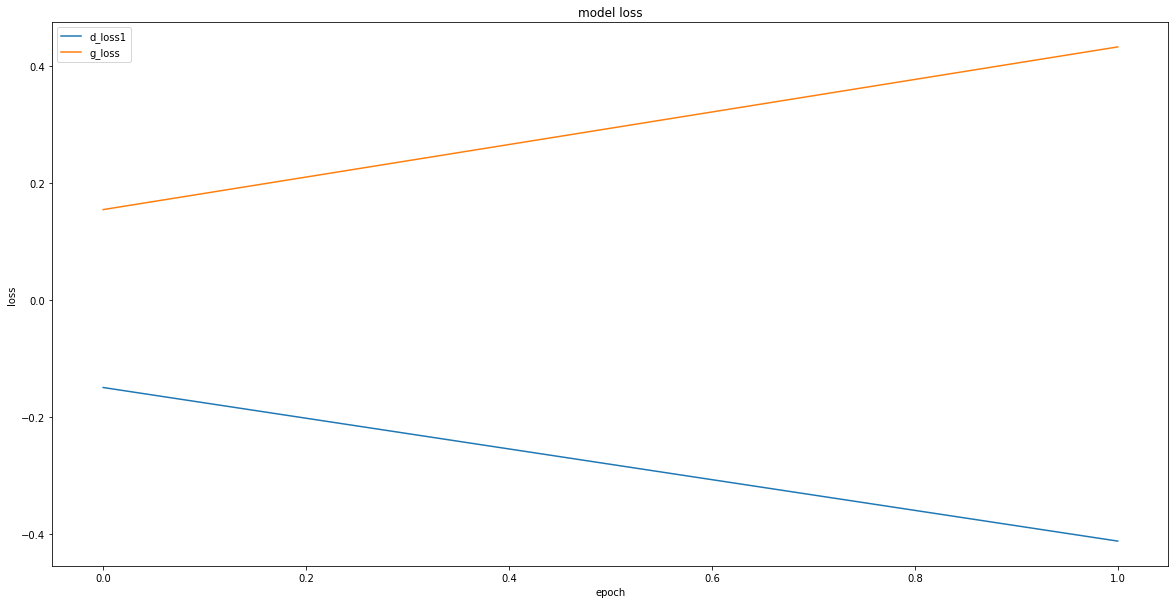

iteration 0 b_step 0.02 b_step 405
** Best val auc:  0
(d_r1 -0.572, d_r2 0.775
(d_f1 0.594, d_f2 0.530)
(g_1 -59.646,g_2 0.000)

iteration 0 b_step 0.02 b_step 420
** Best val auc:  0
(d_r1 -0.524, d_r2 0.714
(d_f1 0.546, d_f2 0.573)
(g_1 -61.475,g_2 0.000)

iteration 0 b_step 0.02 b_step 435
** Best val auc:  0
(d_r1 -0.314, d_r2 0.706
(d_f1 0.321, d_f2 0.602)
(g_1 -62.706,g_2 0.000)

iteration 0 b_step 0.02 b_step 450
** Best val auc:  0
(d_r1 -0.966, d_r2 0.852
(d_f1 1.045, d_f2 0.455)
(g_1 -63.961,g_2 0.000)

iteration 0 b_step 0.02 b_step 465
** Best val auc:  0
(d_r1 -0.851, d_r2 0.872
(d_f1 0.918, d_f2 0.486)
(g_1 -65.147,g_2 0.000)

iteration 0 b_step 0.02 b_step 480
** Best val auc:  0
(d_r1 -0.578, d_r2 0.821
(d_f1 0.613, d_f2 0.560)
(g_1 -65.676,g_2 0.000)

iteration 0 b_step 0.02 b_step 495
** Best val auc:  0
(d_r1 -0.457, d_r2 0.734
(d_f1 0.474, d_f2 0.581)
(g_1 -67.027,g_2 0.000)

iteration 0 b_step 0.02 b_step 510
** Best val auc:  0
(d_r1 -0.582, d_r2 0.773
(d_f1 0.59

/hd/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/hd/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/hd/anaconda3/envs/master/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/hd/anaconda3/envs/mas

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     91315
           1       0.33      1.00      0.50     45646

    accuracy                           0.33    136961
   macro avg       0.17      0.50      0.25    136961
weighted avg       0.11      0.33      0.17    136961

Found best loss
** Best val auc:  0
Validation auc: 0.24996851161236971


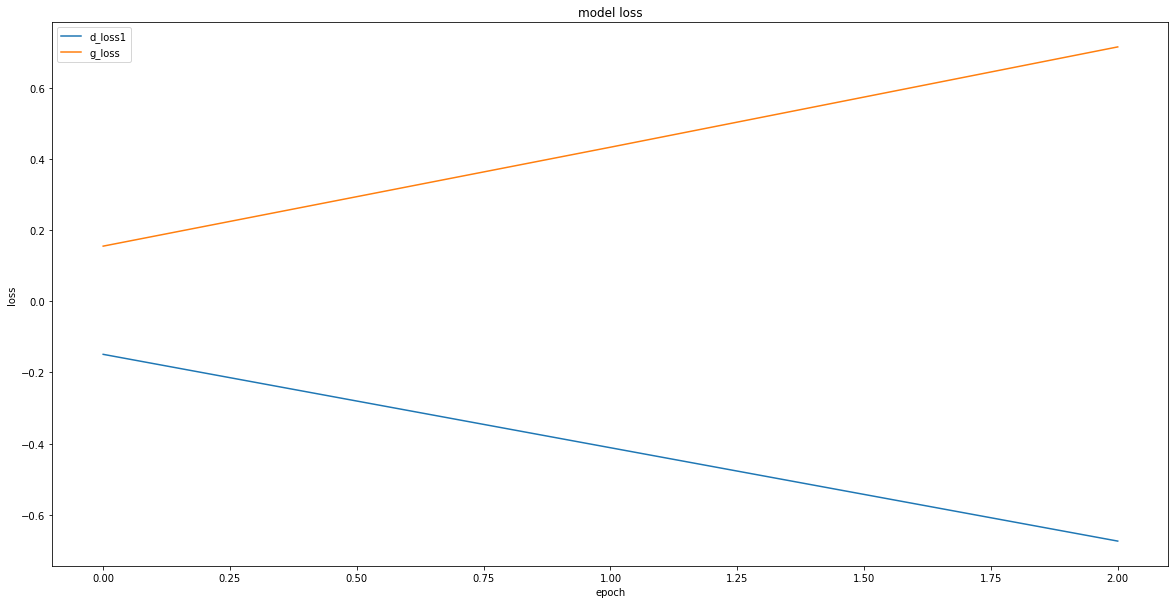

In [ ]:
import tensorflow as tf

log_step = 200
disabled_gan = False
disable_buyer = False
epochs = 80
callback = manual_clear
clip_value =0.01
subtrain = 5
train_args = ['', init_iter, epochs, subtrain, log_step, 1000*1000*1000*1000, disabled_gan, disable_buyer, log_step*2, callback, clip_value]

wgangp.batch_size=13*4
print(wgangp.batch_size)
# with tf.device('/device:GPU:0'):
wgangp.train(dataset, train_args)

In [ ]:
wgangp.print_fakes_for_k()

In [ ]:
wgangp.load_model()

In [ ]:
init_iter = wgangp.last_iteration
init_iter

In [ ]:
wgangp.evaluate_buyer_classifier(dataset)

In [ ]:

import lib.input.single_stg.scale as scale
from lib.models.single_stage import training
from lib.utils import process_input
from imp import reload
    # Do some things.
single = reload(single)
process_input = reload(process_input)

In [ ]:
from lib.utils import process_input

for len_in in range(1,14,4):
    print("For label ****** ",len_in)
    X_fake = wgangp.generate_fakes(1)
    encoders = process_input.get_one_hot_encoders()


    print(single.create_readable_df_stg(X_fake[0].numpy(), get_gen_outs(),encoders))

In [ ]:

create_readable_df_stg(X_train[2], get_gen_outs(),encoders)

In [ ]:
test_dataset = construct_test_dataset()

In [280]:
from sklearn.metrics import classification_report
 
X_test, y_test, _, test_inp_len = test_dataset['all_test']
y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_test[:], y_test[:], 13, test_inp_len[:],  512, True), verbose=1)



362/362 [==============================] - 8s 21ms/step


In [281]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7715066684779969

In [282]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred > 0.5, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.65      0.78    174896
     class 1       0.11      0.76      0.19     10099

    accuracy                           0.65    184995
   macro avg       0.55      0.70      0.49    184995
weighted avg       0.93      0.65      0.75    184995



## Train classifier


In [112]:
test_dataset = construct_test_dataset()

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

In [ ]:
wgangp.load_model()

In [132]:
X_train, y_train, _,train_inp_len = dataset['all_train_under']
X_valid, y_valid, _, valid_inp_len = dataset['all_valid']

In [133]:
d = Counter(y_train)
print(d)
buyers = d[1]

Counter({1: 82219, 0: 82219})


In [134]:
np.random.randint(0,2,20)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [135]:
from scipy import sparse

n_samples = buyers//10
print(n_samples)
noise = tf.random.normal([n_samples, wgangp.noise_dim], dtype=tf.dtypes.float32)
noise.shape

8221


TensorShape([8221, 100])

In [136]:
X_fake = wgangp.generator.predict(noise)

X_fake = [sparse.csr_matrix(k) for k in X_fake]
y_fake = np.ones(len(X_fake))


In [137]:
X_train = np.concatenate((X_train, X_fake))
y_train = np.concatenate((y_train, y_fake))


In [138]:
np.save("X_fake.npy",X_fake)

In [139]:
import gc
gc.collect()

29471

In [140]:
Counter(y_train)

Counter({1.0: 90440, 0.0: 82219})

In [101]:
del dataset
gc.collect()

0

In [ ]:
isinstance(X_train[0], np.array)

In [52]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14893481235911150182
]
Please install GPU version of TF


In [141]:
N = 13
F = dataset['all_train_under'][0][0].toarray().shape[-1]
F,N
X_in = Input((N,F))

len_in = Input((1,))
x = X_in

use_len_label =False

if use_len_label:
    l_in = Lambda(lambda x: x[:,0])(len_in)
    l_in = Embedding(N+1, N)(l_in)
    l_in = RepeatVector(N)(l_in)
    x = Concatenate()([X_in, l_in])      

x = Masking(MASK_VALUE)(x)
# x = (GRU(128, return_sequences = True,activation='relu'))(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)

x = (GRU(64, return_sequences = True,activation='relu'))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)


x  =  Dense(15,activation='relu')(x)
x = Dropout(0.2)(x)
x  =  Dense(15,activation='relu')(x)
x = Dropout(0.2)(x)

x  =  Dense(15,activation='relu')(x)
x = Dropout(0.2)(x)


x = Flatten()(x)
x = Dropout(0.3)(x)

x1 = Dense(1, 'sigmoid',name='disc')(x)

loss_f1 = 'binary_crossentropy'

opt = Adam(lr=1e-3)
model_in = X_in if use_len_label == False else [X_in, len_in]
model =  Model(inputs=model_in, outputs=x1)
model.compile(optimizer = opt,loss = loss_f1, metrics = ['accuracy', AUC(name='auc', multi_label=False)])
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        [(None, 13, 249)]         0         
_________________________________________________________________
masking_3 (Masking)          (None, 13, 249)           0         
_________________________________________________________________
gru_21 (GRU)                 (None, 13, 64)            60480     
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 64)            256       
_________________________________________________________________
activation_5 (Activation)    (None, 13, 64)            0         
_________________________________________________________________
dense_33 (Dense)             (None, 13, 15)            975       
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 15)            0  

In [145]:

batch_size = 1024

validD = DataGenerator(X_valid, y_valid, 13, valid_inp_len, batch_size)
def evalu():
    print(wgangp.buyer_classifier.evaluate(validD))

class Eval(keras.callbacks.Callback):
    def __init__(self, validD, validation=None):
        super(Eval, self).__init__()
        self.validD = validD
        self.valid_loss, self.valid_acc, self.valid_auc = [],[],[]
    
#     def on_train_begin(self, logs={}):
        
    def on_epoch_end(self, batch, logs={}):
        loss, acc, auc = wgangp.buyer_classifier.evaluate(self.validD)
        self.valid_loss.append(loss)
        self.valid_acc.append(acc)
        self.valid_auc.append(auc)

from tensorflow.keras.callbacks import * 
batch_size = 1024

checkpoint_filepath='./cache/normal_classifier.h5'
m = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True)
h = model.fit(
    DataGenerator(X_train[:], y_train[:], 13, train_inp_len[:],  512),
    validation_data=validD,
    callbacks = [m],
    epochs=30)
        

Epoch 1/30
338/338 [==============================] - 21s 62ms/step - loss: 0.5930 - accuracy: 0.6760 - auc: 0.7415 - val_loss: 0.5788 - val_accuracy: 0.8367 - val_auc: 0.7565
Epoch 2/30
338/338 [==============================] - 18s 53ms/step - loss: 0.5405 - accuracy: 0.7263 - auc: 0.7992 - val_loss: 0.6128 - val_accuracy: 0.7232 - val_auc: 0.7589
Epoch 3/30
338/338 [==============================] - 18s 53ms/step - loss: 0.5246 - accuracy: 0.7381 - auc: 0.8132 - val_loss: 0.6266 - val_accuracy: 0.6882 - val_auc: 0.7623
Epoch 4/30
338/338 [==============================] - 18s 53ms/step - loss: 0.5186 - accuracy: 0.7426 - auc: 0.8182 - val_loss: 0.4564 - val_accuracy: 0.8322 - val_auc: 0.7633
Epoch 5/30
338/338 [==============================] - 18s 53ms/step - loss: 0.5125 - accuracy: 0.7467 - auc: 0.8232 - val_loss: 0.4428 - val_accuracy: 0.8247 - val_auc: 0.7646
Epoch 6/30
338/338 [==============================] - 18s 54ms/step - loss: 0.5077 - accuracy: 0.7494 - auc: 0.8273 - va

In [146]:
model.load_weights(checkpoint_filepath)

In [147]:
from sklearn.metrics import classification_report
 
X_test, y_test, _, test_inp_len = test_dataset['all_test']
y_pred = model.predict(DataGenerator(X_test[:], y_test[:], 13, test_inp_len[:],  512), verbose=1)



362/362 [==============================] - 7s 19ms/step


In [148]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.7652961461423953

In [ ]:

target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred > 0.5, target_names=target_names))